In [1]:
import numpy as np;
import matplotlib as mp;
import matplotlib.pyplot as plt;
import matplotlib.patches as patches;
import pandas as pd;
import math;

# Mean and variance

Python offers several alternatives for easy evaluation of the sample mean and variance of data. Let us see e.g., how to solve this problem using numpy. Remember, these two fundamental statistics are defined as 
\begin{eqnarray}
\overline{X} &=& \frac{1}{n}\sum_{i=1}^n x_i, \nonumber \\
S^2 &=& \frac{1}{n-1}\sum_{i=1}^n (x_i - \overline{X})^2 \nonumber
\end{eqnarray}

Let us generate random samples for which we know the true mean and variance, and "check" whether we get something close using the sample mean and variance. E.g., we can generate Normal distributed random numbers with prescribed mean $\mu$ and variance $\sigma^2$:

In [2]:
mu,sigma,num_points = 20,5.0,10000;
normal_data = np.random.normal(mu,sigma,num_points);

To evaluate the sample mean and variance of the generated data we can use numpy's built in mean and var functions. **CAUTION!** numpy.var() is a general function where the denominator in the formula of $S^2$ is $n-ddof$, where the parameter $ddof$ is 0 by default. 

In [3]:
mean,var = np.mean(normal_data),np.var(normal_data,ddof=1.0); # the denominator in S^2 is n-ddof. The default
                                                              # value is 0, so we need to set it to 1.
print('mean = ',mean,' var =',var,' sigma =',math.sqrt(var));

mean =  19.915308332511582  var = 25.311110509658377  sigma = 5.031014858819081


In [36]:
mean_list, var_list = [], []
for ii in range(10000):
    mu,sigma,num_points = 20,5.0,1000
    normal_data = np.random.normal(mu,sigma,num_points);
    mean,var = np.mean(normal_data),np.var(normal_data);
    mean_list.append(mean)
    var_list.append(var)
np.average(mean_list), math.sqrt(np.average(var_list)), sigma*sigma/np.average(var_list)*(num_points-1)-num_points

(19.999117788130008, 4.996682087161506, 0.3271588433223087)

In [22]:
np.var(normal_data, ddof=1)/np.var(normal_data, ddof=0)*(num_points-1)-num_points

1.1368683772161603e-13

## Convergence of the sample mean and variance

Let us now examine the convergence of the sample mean and variance by plotting them as a functions of the included number of data points. 

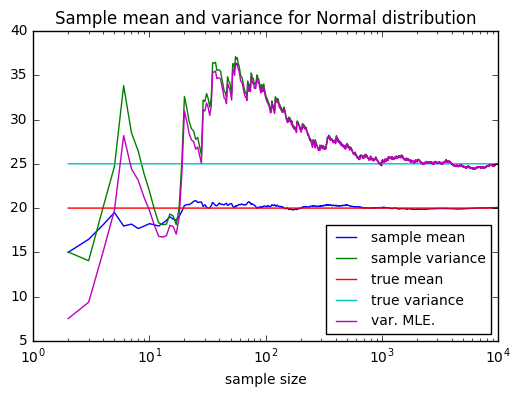

In [4]:
plt.clf();
mean_list = [np.mean(normal_data[0:i]) for i in range(2,len(normal_data)+1)];
var_list = [np.var(normal_data[0:i],ddof=1.0) for i in range(2,len(normal_data)+1)];
var_alt_list = [np.var(normal_data[0:i]) for i in range(2,len(normal_data)+1)];

data_size_list = range(2,len(mean_list)+2);
mu_list,sigma_list = [mu]*len(mean_list),[sigma**2]*len(var_list);

plt.semilogx(data_size_list,mean_list,label='sample mean');
plt.semilogx(data_size_list,var_list,label='sample variance');
plt.semilogx(data_size_list,mu_list,label='true mean');
plt.semilogx(data_size_list,sigma_list,label='true variance');
plt.semilogx(data_size_list,var_alt_list, label = 'var. MLE.');
plt.legend(loc= 'lower right',fontsize = 10);
plt.title('Sample mean and variance for Normal distribution')
plt.xlabel('sample size');
plt.show();

Let's try out the same for a Pareto (Lomax) distribution as well!

In [5]:
pareto_data = np.random.pareto(3.5,num_points);
pareto_data = np.random.pareto(2.5,num_points);
pareto_data = np.random.pareto(1.5,num_points);
pareto_data = np.random.pareto(0.5,num_points);

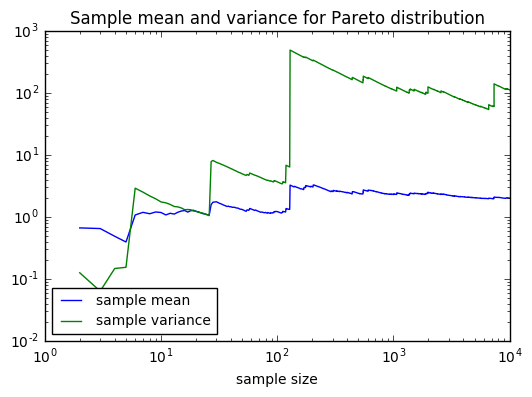

In [6]:
plt.clf();
mean_list = [np.mean(pareto_data[0:i]) for i in range(2,len(pareto_data)+1)];
var_list = [np.var(pareto_data[0:i],ddof=1.0) for i in range(2,len(pareto_data)+1)];
data_size_list =range(2,len(mean_list)+2);

plt.loglog(data_size_list,mean_list,label = 'sample mean');
plt.loglog(data_size_list,var_list,label = 'sample variance');
plt.legend(loc = 'lower left', fontsize = 10);
plt.title('Sample mean and variance for Pareto distribution')
plt.xlabel('sample size');
plt.show();

Let us repeat the above with data that was drawn from Cauchy distribution!

In [7]:
cauchy_data = np.random.standard_cauchy(num_points);

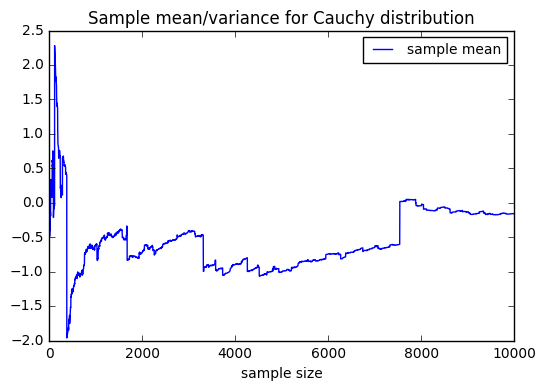

In [8]:
plt.clf();
mean_list = [np.mean(cauchy_data[0:i]) for i in range(2,len(cauchy_data)+1)];
var_list = [np.var(cauchy_data[0:i],ddof=1.0) for i in range(2,len(cauchy_data)+1)];
data_size_list = range(2,len(mean_list)+2);

plt.plot(data_size_list,mean_list,label='sample mean');
#plt.loglog(data_size_list,var_list,label='sample variance');
plt.legend(loc= 'upper right',fontsize = 10);
plt.title('Sample mean/variance for Cauchy distribution')
plt.xlabel('sample size');
plt.show();

## Simulating the stock market

A very simple model of a fluctuating stock value is the following: In every time step its value is either increased by 1 cent, or is decreased by 1 cent with equal probabilities.

Let's simulate this simply by drawing a random sequence of 1 and -1, and summing the obtained values. 

First we define the number of stocks, and the number of time steps.

In [9]:
num_stocks = 3;
num_time_steps = 10000;

We are going to put the generated time sequences of the stocks into a list.

In [10]:
stock_time_series_list = [];
stock_time_series_list.clear();
for i in range(0,num_stocks):
    rand_changes = list(np.random.choice([-1,1],num_time_steps)); # these are the random -1 and 1 dollars
    stock_value = [sum(rand_changes[0:n]) for n in range(1,len(rand_changes))]; # we simply add up the first n 
    stock_time_series_list.append(stock_value);

Let's make actually two plots: 
- first only up to the first 1000 time steps,
- next all the way up to 10000 time steps (and highlight within the area shown in the previous figure)

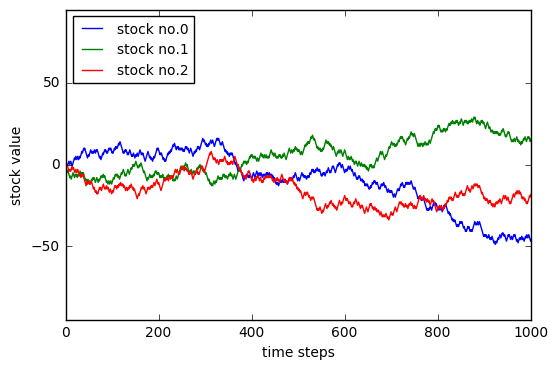

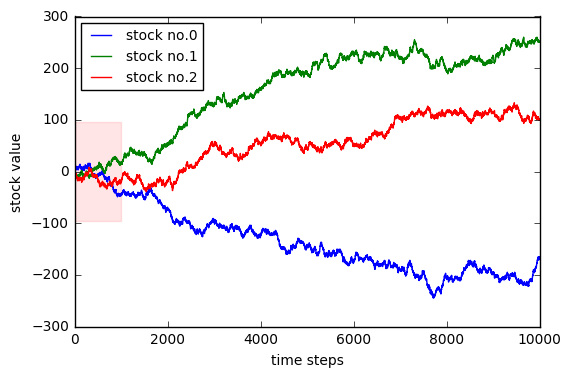

In [11]:
plt.clf();
t_list = range(0,len(stock_time_series_list[0]));
for i in range(0,len(stock_time_series_list)):
    plt.plot(t_list,stock_time_series_list[i],label = 'stock no.'+str(i));
plt.xlabel('time steps');
plt.ylabel('stock value');
plt.xlim(0,1000);
plt.ylim(-95,95);
plt.legend(loc= 'upper left',fontsize = 10);
plt.show();

plt.clf();
fig,ax = plt.subplots();
for i in range(0,len(stock_time_series_list)):
    plt.plot(t_list,stock_time_series_list[i],label = 'stock no.'+str(i));
plt.xlabel('time steps');
plt.ylabel('stock value');
plt.ylim(-300,300);
rect = patches.Rectangle((0,-95),1000,190,edgecolor='r',facecolor='r', alpha = 0.1);
ax.add_patch(rect);
plt.legend(loc= 'upper left',fontsize = 10);
plt.show();

- Observe that the two figures look quite similar. (More on that on the Fractals course).
- ** What do you think, how was the vertical scale (set by ylim) chosen? **
- Try out changing the scale of the first figure to see that it does not look similar to the 2nd if the horisontal - vertical scales are not "properly" set.